# Drug Classification using Ensemble Methods

## Dataset Description

This notebook explores the application of ensemble methods for drug classification using the `Drug200.csv` dataset. The dataset contains information about patients and their prescribed drugs based on various medical and demographic features.

### Features:
- **Age**: Patient's age (numerical)
- **Sex**: Patient's gender (categorical: M/F)
- **BP**: Blood Pressure level (categorical: HIGH/NORMAL/LOW)
- **Cholesterol**: Cholesterol level (categorical: HIGH/NORMAL)
- **Na_to_K**: Sodium to Potassium ratio in blood (numerical)

### Target Variable:
- **Drug**: The prescribed drug (5 classes: drugA, drugB, drugC, drugX, DrugY)

### Dataset Statistics:
- Total number of samples: 200
- Number of features: 5
- Number of target classes: 5

### Objective:
The goal of this notebook is to:
1. Explore and preprocess the dataset
2. Implement and compare different ensemble methods
3. Evaluate model performance
4. Analyze feature importance
5. Draw conclusions about the effectiveness of ensemble methods for drug classification

This analysis will help understand which ensemble methods work best for predicting the appropriate drug based on patient characteristics.

In [8]:
import pandas as pd

df = pd.read_csv(r"datasets/drug200.csv")
print("Dataset Shape:", df.shape)
print("\nFirst few rows of the dataset:")
df.head()

Dataset Shape: (200, 6)

First few rows of the dataset:


,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


#### Encode categorical features (`Sex`, `Cholesterol`, `BP`) to numbers.
Use the following rules:
```
- 'Sex': M = 0, F = 1
- 'Cholesterol': NORMAL = 0, HIGH = 1
- 'BP': LOW = -1, NORMAL = 0, HIGH = 1
```

In [9]:
df["Sex"] = df["Sex"].map({"M": 0, "F": 1})
df["Cholesterol"] = df["Cholesterol"].map({"NORMAL": 0, "HIGH": 1})
df["BP"] = df["BP"].map({"LOW": -1, "NORMAL": 0, "HIGH": 1})
print("First few rows of encoded dataframe:")
print(df.head())


First few rows of encoded dataframe:
   Age  Sex  BP  Cholesterol  Na_to_K   Drug
0   23    1   1            1   25.355  DrugY
1   47    0  -1            1   13.093  drugC
2   47    0  -1            1   10.114  drugC
3   28    1   0            1    7.798  drugX
4   61    1  -1            1   18.043  DrugY


#### Use `Drug` as a target and other features as predictors. Split the data with stratification by target.

In [10]:
from sklearn.model_selection import train_test_split

random_state = 42

X = df.drop("Drug", axis=1)
y = df["Drug"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=random_state, stratify=y)

#### Fit `Decision Tree` and `Random Forest` classifiers on train data.

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(max_depth=2, random_state=random_state)
rf_clf = RandomForestClassifier(max_depth=2, random_state=random_state)

dt_clf.fit(X_train, y_train)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, random_state=42)

#### Get predictions on test data for all models.

In [12]:
dt_pred = dt_clf.predict(X_test)
rf_pred = rf_clf.predict(X_test)

#### Calculate accuracy, micro and macro recalls and precisions for both models.

In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Calculate metrics for Decision Tree model
dtr_clf_accuracy = accuracy_score(y_test, dt_pred)
dtr_clf_precision_micro = precision_score(y_test, dt_pred, average="micro")
dtr_clf_precision_macro = precision_score(y_test, dt_pred, average="macro")
dtr_clf_recall_micro = recall_score(y_test, dt_pred, average="micro")
dtr_clf_recall_macro = recall_score(y_test, dt_pred, average="macro")

# Calculate metrics for Random Forest model
rf_clf_accuracy = accuracy_score(y_test, rf_pred)
rf_clf_precision_micro = precision_score(y_test, rf_pred, average="micro")
rf_clf_precision_macro = precision_score(y_test, rf_pred, average="macro")
rf_clf_recall_micro = recall_score(y_test, rf_pred, average="micro")
rf_clf_recall_macro = recall_score(y_test, rf_pred, average="macro")

print("Decision Tree model metrics:")
print(f"Accuracy: {dtr_clf_accuracy:.3f}")
print(f"Micro-averaged precision: {dtr_clf_precision_micro:.3f}")
print(f"Macro-averaged precision: {dtr_clf_precision_macro:.3f}")
print(f"Micro-averaged recall: {dtr_clf_recall_micro:.3f}")
print(f"Macro-averaged recall: {dtr_clf_recall_macro:.3f}")
print("\nRandom Forest model metrics:")
print(f"Accuracy: {rf_clf_accuracy:.3f}")
print(f"Micro-averaged precision: {rf_clf_precision_micro:.3f}")
print(f"Macro-averaged precision: {rf_clf_precision_macro:.3f}")
print(f"Micro-averaged recall: {rf_clf_recall_micro:.3f}")
print(f"Macro-averaged recall: {rf_clf_recall_macro:.3f}")

Decision Tree model metrics:
Accuracy: 0.820
Micro-averaged precision: 0.820
Macro-averaged precision: 0.462
Micro-averaged recall: 0.820
Macro-averaged recall: 0.585

Random Forest model metrics:
Accuracy: 0.900
Micro-averaged precision: 0.900
Macro-averaged precision: 0.742
Micro-averaged recall: 0.900
Macro-averaged recall: 0.785


c:\Users\PC\Documents\Projects\ML-Spring-Practical-Tasks\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\PC\Documents\Projects\ML-Spring-Practical-Tasks\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#### Confusion matrix for Decision Tree model.

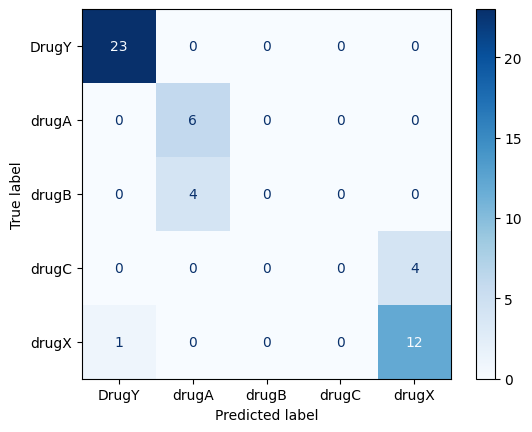

In [14]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, dt_pred, cmap="Blues")

#### Confusion matrix for Random Forest model.

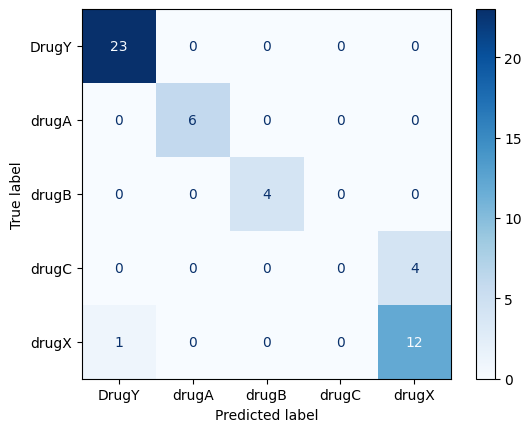

In [15]:
ConfusionMatrixDisplay.from_predictions(y_test, rf_pred, cmap="Blues")